## Mapping locations

from http://introtopython.org/visualization_earthquakes.html

start with
conda install -c conda-forge basemap
conda install -c conda-forge basemap-data-hires

In [129]:
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# pip install xlrd
import xlrd

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

In [49]:
lats, lons = [], []
magnitudes = []

In [130]:
excel_file ='long lat pc.xlsx'
data = pd.read_excel(excel_file)


dataS=data['States']
states1 = np.array(dataS).reshape(7)

dataLat=data['Latitude']
lats1 = np.array(dataLat).reshape(7)

dataLon=data['Longitude']
lons1 = np.array(dataLon).reshape(7)

dataV=data['Value']
value1 = np.array(dataV).reshape(7)

dataInfo1=data['info1']
dataInfo1 = np.array(dataInfo1).reshape(7)

dataInfo2=data['info2']
dataInfo2 = np.array(dataInfo2).reshape(7)

dataInfo3=data['info3']
dataInfo3 = np.array(dataInfo3).reshape(7)

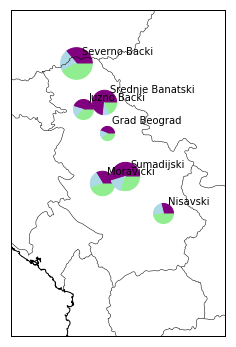

In [144]:
#
# BaseMap example by geophysique.be
# tutorial 05
 

import math

 
colors = ['purple','lightblue','lightgreen','orange','magenta','red']
 
def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
 
    tq = []
 
    start = 0.
    for ratio in ratios:
        t = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        q = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        we=list(zip(t,q))
#         tq.append(zip(t,q))
        tq.append(we)
        start += ratio
 
    for i, tqi in enumerate(tq):
        ax.scatter(X, Y, marker=(tqi,0), s=size, facecolor=colors[i] )
        
        
ax = plt.subplot(111)     
# my_map = Basemap(projection='merc', lat_0=40, lon_0=20,
#               resolution='h', area_thresh=1000.0, llcrnrlon=18, llcrnrlat=41,
#               urcrnrlon=23.5, urcrnrlat=47)
my_map = Basemap(projection='merc',
              resolution='h', area_thresh=1000.0, llcrnrlon=18, llcrnrlat=41,
               urcrnrlon=23.5, urcrnrlat=47)

m = Basemap( llcrnrlat=49.0,urcrnrlat=52.0,llcrnrlon=1.,urcrnrlon=8.0,lat_ts=51.0)
m.drawcountries(linewidth=0.5)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.fillcontinents(color='lightyellow')
# nicer globe boundary
my_map.drawmapboundary() 

my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 200
for lon, lat, val, label, inf1, inf2, inf3 in zip(lons1, lats1, value1, states1, dataInfo1, dataInfo2, dataInfo3):
    ya,xa = my_map(lon, lat, inverse=False)
    msize = val * min_marker_size
    draw_pie(ax,[inf1,inf2, inf3], ya, xa, msize)   

for lon, lat, label in zip(lons1, lats1, states1):
    ya,xa = my_map(lon, lat, inverse=False)
    plt.text(ya+15000,xa+25000,label)

    
plt.show()